# Imports

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.utils.column_import import columns
from config.settings import ROOT_DIR, saved_models_path

s_x, s_y, v_x, v_y, a_x, a_y = columns

/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/inD/x_y_recording_00_range_384.csv
/home/ali/tum/motion_planning/social_ai_practical_course/data/processed/scenario_samples/test_set/lane_merging_merged_dif_test.csv


## Load models 

In [2]:
# Load the models
def load_model(model_name):
    model_file_path = os.path.join(saved_models_path, f'acceleration_model_7/{model_name}.pkl')

    if os.path.exists(model_file_path):
        with open(model_file_path, 'rb') as file:
            loaded_model = pickle.load(file)
        
        print(f'Model "{model_name}" loaded from: {model_file_path}')
        return loaded_model
    else:
        print(f'Model file not found for "{model_name}"')
        return None

loaded_first_model = load_model('first_model')
loaded_second_model = load_model('second_model')

Model "first_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/acceleration_model_7/first_model.pkl
Model "second_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/acceleration_model_7/second_model.pkl


## Load the coefficients

In [3]:
# Get the coefficients
c_0_overline = loaded_first_model.coef_[0]
c_1_overline = loaded_first_model.coef_[1]
c_2_overline = loaded_first_model.coef_[2]
c_3_overline = loaded_second_model.coef_[0]
c_4_overline = loaded_second_model.coef_[1]
c_5_overline = loaded_second_model.coef_[2]
c_6_overline = loaded_second_model.coef_[3]

# Print the coefficients
print(f'Coefficients for the first model:')
print(f'c_0_overline: {c_0_overline}')
print(f'c_1_overline: {c_1_overline}')
print(f'c_2_overline: {c_2_overline}')
print(f'c_3_overline: {c_3_overline}')
print(f'c_4_overline: {c_4_overline}')
print(f'c_5_overline: {c_5_overline}')
print(f'c_6_overline: {c_6_overline}')

Coefficients for the first model:
c_0_overline: 2.0623331480719683e-19
c_1_overline: 1.0
c_2_overline: 5.551115123125783e-17
c_3_overline: 1.3604342065710256e-17
c_4_overline: -6.331740687315346e-17
c_5_overline: -0.9999999999999993
c_6_overline: -1.6588293239028218e-16


Rearange the coefficients
\begin{align}
    c_2 = \frac{1}{\overline c_2} \\
    c_0 = \frac{\overline c_0}{\overline c_2} \\
    c_1 = \frac{\overline c_1}{\overline c_2} \\
    c_6 = \frac{1}{\overline c_6} \\
    c_3 = \frac{\overline c_3}{\overline c_6} \\
    c_4 = \frac{\overline c_4}{\overline c_6} \\
    c_5 = \frac{\overline c_5}{\overline c_6} \\
\end{align}


In [4]:
c_2 = 1/ c_2_overline
c_0 = c_0_overline / c_2_overline
c_1 = c_1_overline / c_2_overline
c_6 = 1 / c_6_overline
c_3 = c_3_overline / c_6_overline
c_4 = c_4_overline / c_6_overline
c_5 = c_5_overline / c_6_overline

# Print the rearranged coefficients
print(f'c₀: {c_0}')
print(f'c₁: {c_1}')
print(f'c₂: {c_2}')
print(f'c₃: {c_3}')
print(f'c₄: {c_4}')
print(f'c₅: {c_5}')
print(f'c₆: {c_6}')

c₀: 0.0037151691188682954
c₁: 1.8014398509481984e+16
c₂: 1.8014398509481984e+16
c₃: -0.08201170469848308
c₄: 0.38169934640522873
c₅: 6028347736506385.0
c₆: -6028347736506389.0


# Integration method

\begin{align}
v(k+1) &= v(k) + c_0 v(k-1) + c_1 a(k) + c_2 a(k-1) \\
s(k+1) &= s(k) + c_3 s(k-1) + dt \  v(k) + c_4v(k-1) + c_5 a(k) + c_6 a(k-1) \\
\end{align}



In [5]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

In [6]:
v_x_test = v_x[1:-1] + c_0 * v_x[0:-2] + c_1 * a_x[1:-1] + c_2 * a_x[0:-2]
v_y_test = v_y[1:-1] + c_0 * v_y[0:-2] + c_1 * a_y[1:-1] + c_2 * a_y[0:-2]

In [7]:
dt = 0.04
s_x_test = s_x[1:-1] + c_3 * s_x[0:-2] + dt * v_x[1:-1] + c_4 * v_x[0:-2] + c_5 * a_x[1:-1] + c_6 * a_x[0:-2]
s_y_test = s_y[1:-1] + c_3 * s_y[0:-2] + dt * v_y[1:-1] + c_4 * v_y[0:-2] + c_5 * a_y[1:-1] + c_6 * a_y[0:-2]

1.0788548483973184e+16


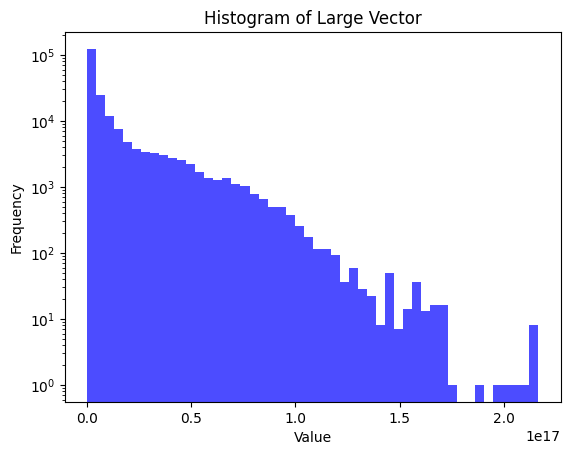

1.0948777919354464e+16


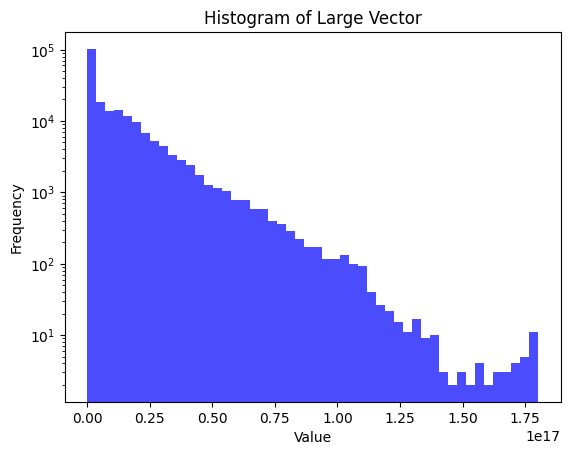

72599222663512.75


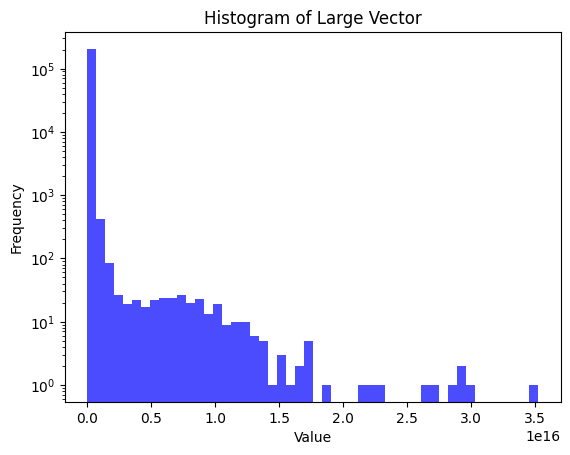

67453697647939.3


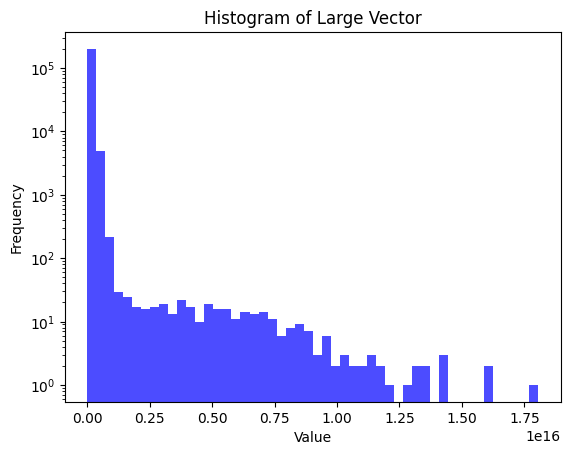

In [8]:
def mean_error(actual, test):
    difference = np.abs(actual - test)
    
    # Calculate the
    mean = np.mean(difference)
    print(mean)

    # Print a bar graph
    plt.hist(difference, bins=50, color='blue', alpha=0.7, log=True)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Large Vector')
    plt.show()



mean_error(v_x_test, v_x[2:])
mean_error(v_y_test, v_y[2:])
mean_error(s_x_test, s_x[2:])
mean_error(s_y_test, s_y[2:])

## Evaluation


In [9]:
def evaluate(y_test, y_pred):
    # Visualize the results

    plt.figure(figsize=(8, 4))
    # Evaluate the model using various metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the results in scientific notation
    print(f'Mean Squared Error (MSE): {mse:.4e}')
    print(f'Mean Absolute Error (MAE): {mae:.4e}')
    print(f'R-squared (R²) Score: {r2:.4e}')


    # Scatter plot of actual vs. predicted values with locus (line of identity)
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Locus
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residual plot
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

    plt.tight_layout()
    plt.show()
 

Mean Squared Error (MSE): 1.5375e+29
Mean Absolute Error (MAE): 7.2599e+13
R-squared (R²) Score: -5.1980e-11


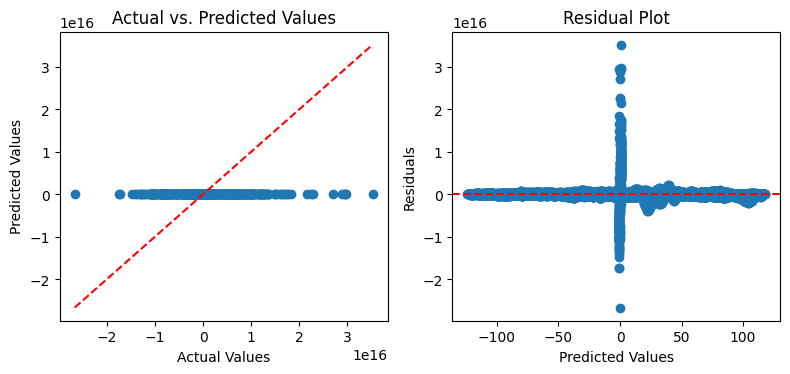

Mean Squared Error (MSE): 7.5178e+28
Mean Absolute Error (MAE): 6.7454e+13
R-squared (R²) Score: -5.9100e-09


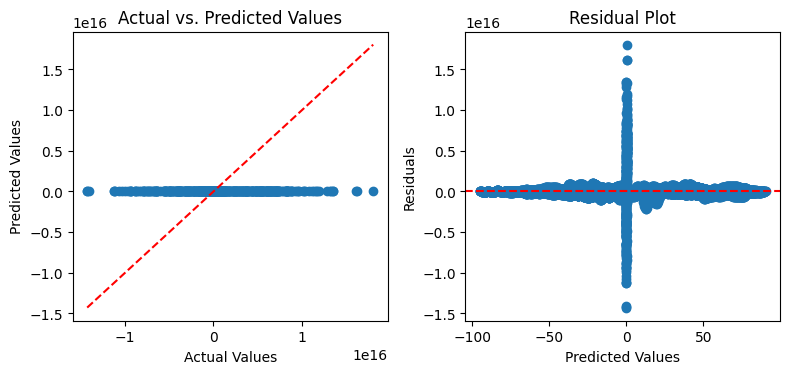

Mean Squared Error (MSE): 5.0340e+32
Mean Absolute Error (MAE): 1.0789e+16
R-squared (R²) Score: -7.8714e-02


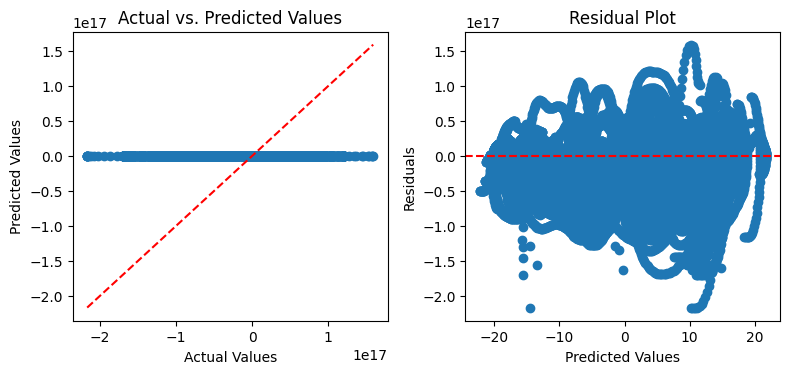

Mean Squared Error (MSE): 3.8358e+32
Mean Absolute Error (MAE): 1.0949e+16
R-squared (R²) Score: -1.9520e-02


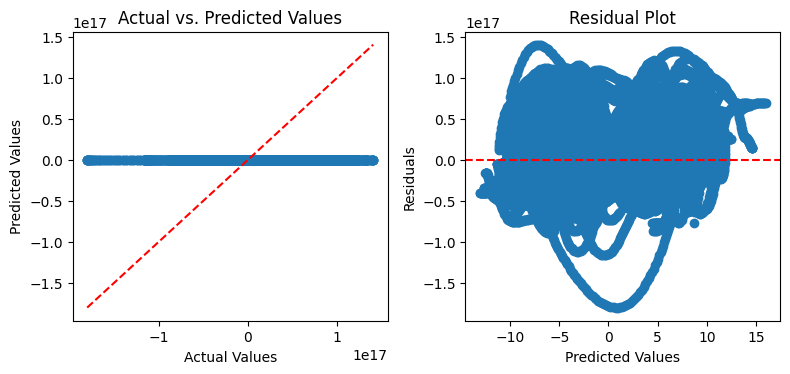

In [10]:
evaluate(s_x_test,s_x[2:])
evaluate(s_y_test,s_y[2:])
evaluate(v_x_test,v_x[2:])
evaluate(v_y_test,v_y[2:])
